#  Prosper Loan Exploration
## by Abdulmalek Alsaati

## Preliminary Wrangling

> This document explores Dataset for Prosper Loan (P2P Loan). This data contains 113937 observation (rows), with 81 variable for each observation,  including loan amount, borrower rate, current loan  status, borrower income, borrower employment status .. etc 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
loan_df = pd.read_csv("prosperLoanData.csv")


In [3]:
#select only intrested columns
columns = ['LoanStatus','EstimatedEffectiveYield','EstimatedReturn','ProsperScore','BorrowerAPR','BorrowerRate',
'EmploymentStatus','ProsperRating (Alpha)','StatedMonthlyIncome',
'MonthlyLoanPayment','DebtToIncomeRatio','LoanOriginalAmount','LoanOriginationQuarter','LoanOriginationDate','Term','IncomeRange']

loan_df = loan_df[columns]

In [4]:
# high-level overview of data shape and composition
print(loan_df.shape)
print(loan_df.dtypes)

(113937, 16)
LoanStatus                  object
EstimatedEffectiveYield    float64
EstimatedReturn            float64
ProsperScore               float64
BorrowerAPR                float64
BorrowerRate               float64
EmploymentStatus            object
ProsperRating (Alpha)       object
StatedMonthlyIncome        float64
MonthlyLoanPayment         float64
DebtToIncomeRatio          float64
LoanOriginalAmount           int64
LoanOriginationQuarter      object
LoanOriginationDate         object
Term                         int64
IncomeRange                 object
dtype: object


In [5]:
#Extract Loan Origination Year to use it in analysis
loan_df['LoanOriginationYear'] = pd.to_datetime(loan_df['LoanOriginationDate']).dt.year.astype(str) 

In [6]:
loan_df.head(10)

,LoanStatus,EstimatedEffectiveYield,EstimatedReturn,ProsperScore,BorrowerAPR,BorrowerRate,EmploymentStatus,ProsperRating (Alpha),StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationQuarter,LoanOriginationDate,Term,IncomeRange,LoanOriginationYear
0,Completed,NaN,NaN,NaN,0.16516,0.1580,Self-employed,NaN,3083.333333,330.43,0.17,9425,Q3 2007,2007-09-12 00:00:00,36,"$25,000-49,999",2007
1,Current,0.07960,0.05470,7.0,0.12016,0.0920,Employed,A,6125.000000,318.93,0.18,10000,Q1 2014,2014-03-03 00:00:00,36,"$50,000-74,999",2014
2,Completed,NaN,NaN,NaN,0.28269,0.2750,Not available,NaN,2083.333333,123.32,0.06,3001,Q1 2007,2007-01-17 00:00:00,36,Not displayed,2007
3,Current,0.08490,0.06000,9.0,0.12528,0.0974,Employed,A,2875.000000,321.45,0.15,10000,Q4 2012,2012-11-01 00:00:00,36,"$25,000-49,999",2012
4,Current,0.18316,0.09066,4.0,0.24614,0.2085,Employed,D,9583.333333,563.97,0.26,15000,Q3 2013,2013-09-20 00:00:00,36,"$100,000+",2013
5,Current,0.11567,0.07077,10.0,0.15425,0.1314,Employed,B,8333.333333,342.37,0.36,15000,Q4 2013,2013-12-24 00:00:00,60,"$100,000+",2013
6,Current,0.23820,0.11070,2.0,0.31032,0.2712,Employed,E,2083.333333,122.67,0.27,3000,Q2 2013,2013-04-18 00:00:00,36,"$25,000-49,999",2013
7,Current,0.17830,0.09840,4.0,0.23939,0.2019,Employed,C,3355.750000,372.60,0.24,10000,Q2 2013,2013-05-13 00:00:00,36,"$25,000-49,999",2013
8,Current,0.05221,0.04231,9.0,0.07620,0.0629,Employed,AA,3333.333333,305.54,0.25,10000,Q4 2013,2013-12-12 00:00:00,36,"$25,000-49,999",2013
9,Current,0.05221,0.04231,11.0,0.07620,0.0629,Employed,AA,3333.333333,305.54,0.25,10000,Q4 2013,2013-12-12 00:00:00,36,"$25,000-49,999",2013


In [7]:
loan_df.describe()

,EstimatedEffectiveYield,EstimatedReturn,ProsperScore,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LoanOriginalAmount,Term
count,84853.000000,84853.000000,84853.000000,113912.000000,113937.000000,1.139370e+05,113937.000000,105383.000000,113937.00000,113937.000000
mean,0.168661,0.096068,5.950067,0.218828,0.192764,5.608026e+03,272.475783,0.275947,8337.01385,40.830248
std,0.068467,0.030403,2.376501,0.080364,0.074818,7.478497e+03,192.697812,0.551759,6245.80058,10.436212
min,-0.182700,-0.182700,1.000000,0.006530,0.000000,0.000000e+00,0.000000,0.000000,1000.00000,12.000000
25%,0.115670,0.074080,4.000000,0.156290,0.134000,3.200333e+03,131.620000,0.140000,4000.00000,36.000000
50%,0.161500,0.091700,6.000000,0.209760,0.184000,4.666667e+03,217.740000,0.220000,6500.00000,36.000000
75%,0.224300,0.116600,8.000000,0.283810,0.250000,6.825000e+03,371.580000,0.320000,12000.00000,36.000000
max,0.319900,0.283700,11.000000,0.512290,0.497500,1.750003e+06,2251.510000,10.010000,35000.00000,60.000000


### What is the structure of your dataset?

> The  data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (interest rate), current loan status, borrower income, borrower employment status and many other features.
<br/>The variable that I will explore in this analysis are only 16 .

### What is/are the main feature(s) of interest in your dataset?

> I am most intrested in figuring out the Estemated Return and what variable has affect on it like the Original Loan Amount, Prosper Score and Employment status.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think following features have effect on estemated return ( Original Loan Amount, Employment Status and Prosper Rating).

## Univariate Exploration

> Let's start by taking look at distribution of some variables, we will start with original Loan amount distribution

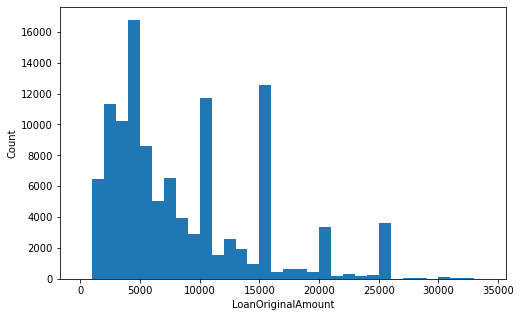

In [8]:
plt.figure(figsize = [8, 5]) 
base_color = sb.color_palette()[0]

bins = np.arange(0, loan_df.LoanOriginalAmount.max(), 1000)
plt.hist(data=loan_df, x='LoanOriginalAmount', bins=bins)
plt.xlabel("LoanOriginalAmount")
plt.ylabel("Count");


> this distribution shows most loan amount are derived from 5k values , and 5k is most frequent loan amount, then 15k and 10k

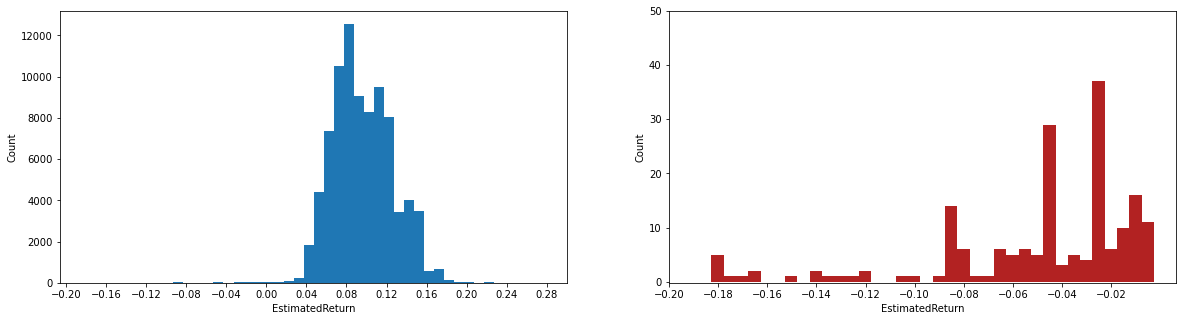

In [60]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 

base_color = sb.color_palette()[0]
bins = np.arange(loan_df.EstimatedReturn.min(), loan_df.EstimatedReturn.max(),0.01)
plt.hist(data=loan_df, x='EstimatedReturn', bins=bins)
plt.xlabel("EstimatedReturn")
plt.ylabel("Count");
plt.xticks(np.arange(-0.2,0.3,0.04));

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
bins = np.arange(loan_df.EstimatedReturn.min(), 0 ,0.005)
plt.hist(data=loan_df, x='EstimatedReturn', bins=bins, color='firebrick')
plt.xlabel("EstimatedReturn")
plt.ylabel("Count");
plt.xticks(np.arange(-0.2,0,0.02))
plt.ylim(-0.2, 50);

It appears most of the loans have an estimated return between 4% and 20%, and there is peak point at 8% and 12%, if we zoom estimated Loss, we can see there is some distribution between -17% to 1%, top loss frequency is -2.5% and -5%.

Let's have look at the distribution of borrower APR.

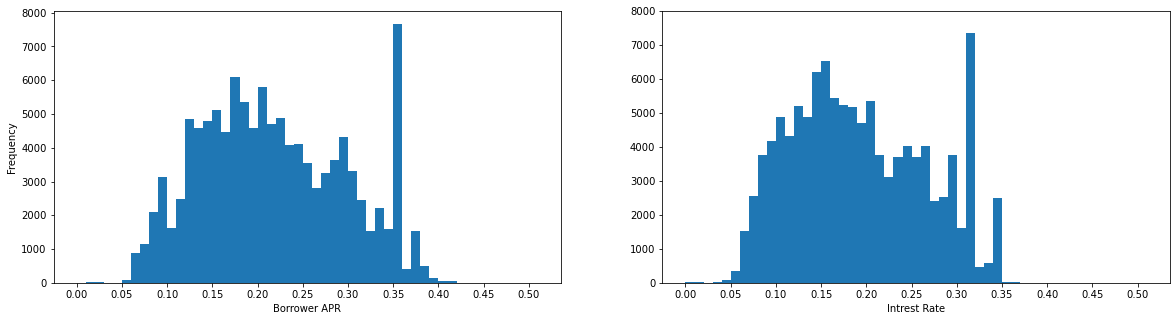

In [10]:
plt.figure(figsize = [20, 5]) 
plt.subplot(1, 2, 1) 

plt.subplot(1, 2, 1) 
bins = np.arange(0, loan_df.BorrowerAPR.max(), 0.01)
plt.hist(data=loan_df, x='BorrowerAPR', bins=bins);
plt.xlabel("Borrower APR");
plt.ylabel("Frequency");
plt.xticks(np.arange(0,0.5+0.05,0.05));

plt.subplot(1, 2, 2)
bins = np.arange(0, loan_df.BorrowerAPR.max(), 0.01)
plt.hist(data=loan_df, x='BorrowerRate', bins=bins);
plt.ylim(0,8000)
plt.xlabel("Intrest Rate");
plt.xticks(np.arange(0,0.5+0.05,0.05));

The Borrower APR range from 0.1 to 0.4, most frequencies for Borrower APR is 35%, there is slightly difference between Interest Rate and Borrower APR, since borrower APR is always more that intrest rate.

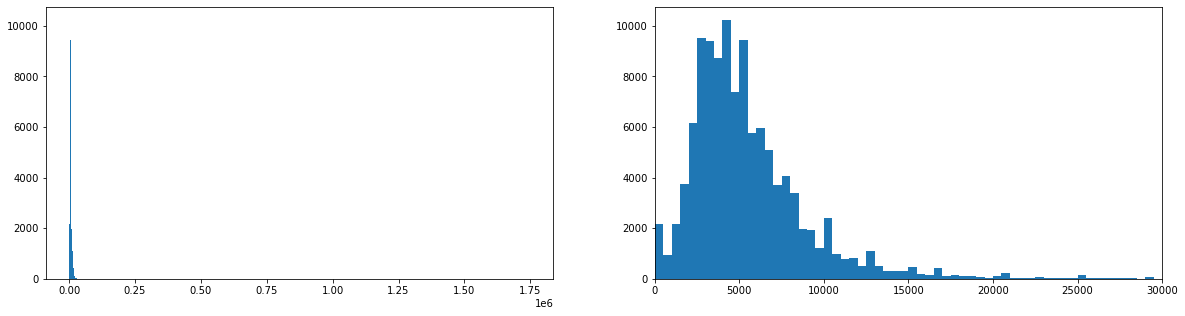

In [11]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
# Distribution of stated monthly income
bins = np.arange(0, loan_df.StatedMonthlyIncome.max(), 500)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins=bins)

plt.subplot(1, 2, 2)
# Distribution of stated monthly income
bins = np.arange(0, loan_df.StatedMonthlyIncome.max(), 500)
plt.hist(data = loan_df, x = 'StatedMonthlyIncome', bins=bins)
plt.xlim(0, 30000);

The StatedMonthlyIncome is highly right skewed, so I limit the data on the right chart to get more clear picture, we can see that most frequent monthly income is 5000.

In [12]:
#lets checks monthly income which is more than 30K
loan_df[loan_df['StatedMonthlyIncome']>30000]

,LoanStatus,EstimatedEffectiveYield,EstimatedReturn,ProsperScore,BorrowerAPR,BorrowerRate,EmploymentStatus,ProsperRating (Alpha),StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LoanOriginalAmount,LoanOriginationQuarter,LoanOriginationDate,Term,IncomeRange,LoanOriginationYear
196,Current,0.12050,0.09060,9.0,0.15752,0.1346,Employed,A,33333.333333,574.73,0.04,25000,Q4 2012,2012-10-29 00:00:00,60,"$100,000+",2012
224,Current,0.09628,0.06388,11.0,0.13799,0.1099,Employed,A,33333.333333,982.02,0.11,30000,Q1 2014,2014-01-15 00:00:00,36,"$100,000+",2014
307,Current,0.10900,0.06910,4.0,0.15223,0.1239,Self-employed,A,40000.000000,501.01,NaN,15000,Q4 2013,2013-12-12 00:00:00,36,"$100,000+",2013
521,Completed,NaN,NaN,NaN,0.17420,0.1670,Full-time,NaN,30166.666667,177.52,0.16,5000,Q4 2007,2007-11-21 00:00:00,36,"$100,000+",2007
637,Current,0.13820,0.08580,6.0,0.19236,0.1559,Employed,B,31666.666667,1223.42,0.08,35000,Q2 2013,2013-06-03 00:00:00,36,"$100,000+",2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111551,Completed,NaN,NaN,NaN,0.30751,0.2997,Self-employed,NaN,32000.000000,1025.37,NaN,25000,Q3 2008,2008-07-28 00:00:00,36,"$100,000+",2008
112211,Completed,0.12850,0.09050,9.0,0.16056,0.1390,Employed,A,30416.666667,853.23,0.08,25000,Q4 2011,2011-10-31 00:00:00,36,"$100,000+",2011
112921,Current,0.05001,0.04261,11.0,0.06726,0.0605,Employed,AA,31666.666667,578.45,0.07,19000,Q4 2013,2013-11-05 00:00:00,36,"$100,000+",2013
113270,Current,0.16790,0.09550,6.0,0.22712,0.1899,Employed,C,394400.000000,73.30,0.00,2000,Q1 2013,2013-02-26 00:00:00,36,"$100,000+",2013


only 327 of 113,937 have monthly income more than 30k, so we can consider it as outliers and it's better to remove them

In [13]:
#lets remove monthly income > 30K, 
loan_df = loan_df[loan_df['StatedMonthlyIncome']<=30000]

Now Let's take a looks at categorical statistics, we will start with loan duration or (Term)

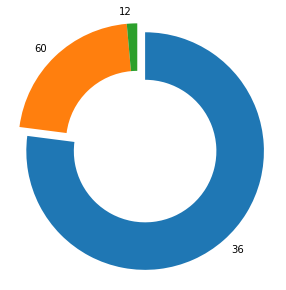

In [14]:
plt.figure(figsize=[5,5])

sorted_counts = loan_df['Term'].value_counts()
explode = (0.1, 0, 0)  
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False,   wedgeprops = {'width' : 0.4}, explode=explode);
plt.axis('square');

we can see that most loan (more than 75%) is 36 months (3 years) , and less people take loan for five year (less than 25%).

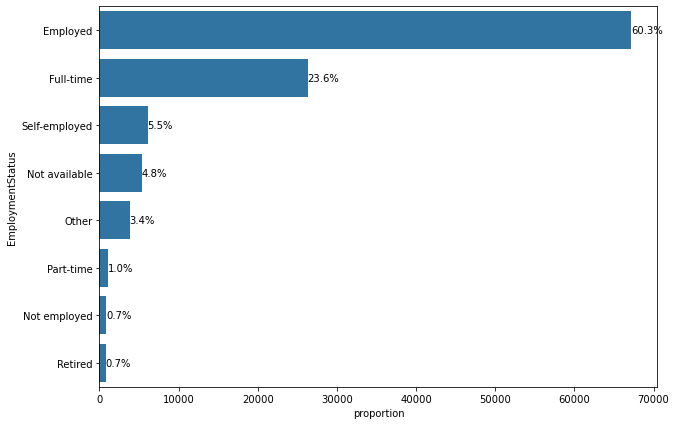

In [15]:
type_count = loan_df['EmploymentStatus'].value_counts()
total_count = loan_df['EmploymentStatus'].value_counts().sum()
type_order = type_count.index
max_type_count = type_count[0]
max_prop = max_type_count / total_count

plt.figure(figsize=[10,7])
sb.countplot(data=loan_df, y='EmploymentStatus', color=base_color, order=type_order);
# Change the tick locations and labels
# plt.xticks(tick_props * total_count, tick_names)
plt.xlabel('proportion');


# Logic to print the proportion text on the bars
for i in range (type_count.shape[0]):
    # Remember, type_counts contains the frequency of unique values in the `type` column in decreasing order.
    count = type_count[i]
    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}%'.format(100*count/total_count)
    # Print the string value on the bar.B
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

Most Borrowers are Employed (60%), and Full-time (23.6%)

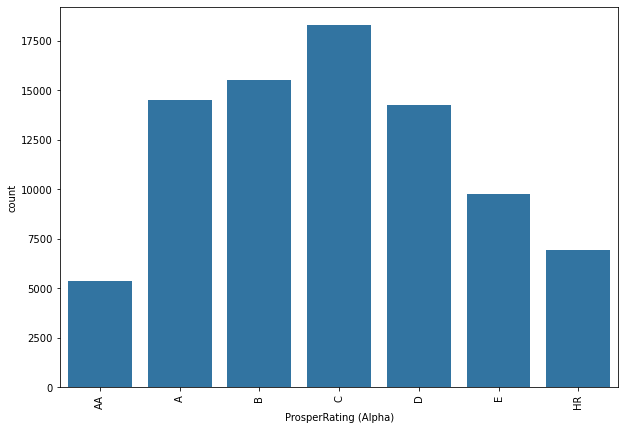

In [16]:
plt.figure(figsize=[10,7])
base_color = sb.color_palette()[0]
plt.xticks(rotation=90)
sb.countplot(data=loan_df, x='ProsperRating (Alpha)', color=base_color, order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

surprisingly, I expect the loan assiciated with Prosper Score HR (High Risk) to be lower that (AA). But in reality HR loan frequency are more than AA, most frequent Prosper Score by order are C, B , A and D .

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> the numerical variables that was explored are (LoanOriginalAmount, Estemated Return , Borrower APR, StatedMonthlyIncome), we can see that most frequent Loan Original amount was 5K, and Borrower APR most frequency was (35%), and StatedMonthlyIncome most frequency is 5k. The estemated return range between 4% and 20%, and there is peak point at 8% and 12%,
>the categorical variables are (Term, EmploymentStatus, ProsperRating), we can see that more than 75% of the Loan Term is 3 years, and 60% of people proportion are Employed, and most frequent Prosper Score by order are C, B , A and D.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> When investigating the StatedMonthlyIncome, the distribution was very right skewed, most frequencies lies between 0 and 30K, for the income value more than 30K, they consider to be outlires and it is better to be removed from the analysis. 


## Bivariate Exploration

> Lets now take look at the variables that we have explored in the first part, and try to find if there is correlation between these variables, lets try to look at numerical paired variables.

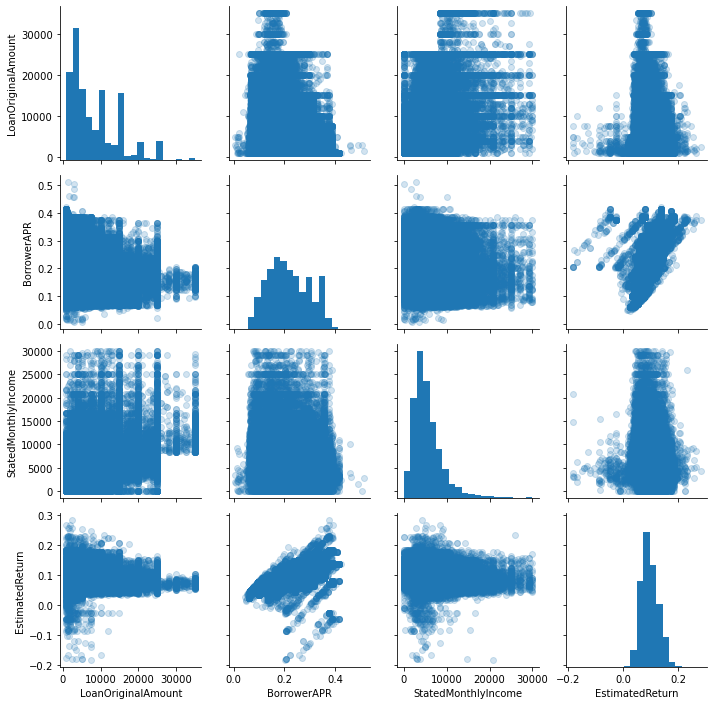

In [17]:
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','EstimatedReturn']
cat_vars = ['Term','ProsperRating (Alpha)', 'EmploymentStatus']

#Distribution of feature variables
g = sb.PairGrid(data=loan_df, vars = num_vars);
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

The selected features in this scatter plots shows poorly correlation between vairables like ( BorrowerAPR and Loan Origainal Amount). to find correlation we need to to do further analysis. we also can see a positive correlation between BorrowerAPR and EstematedReturn. Lets try to have a clear look if there is correlation between BorrowerAPR and Loan Amount.

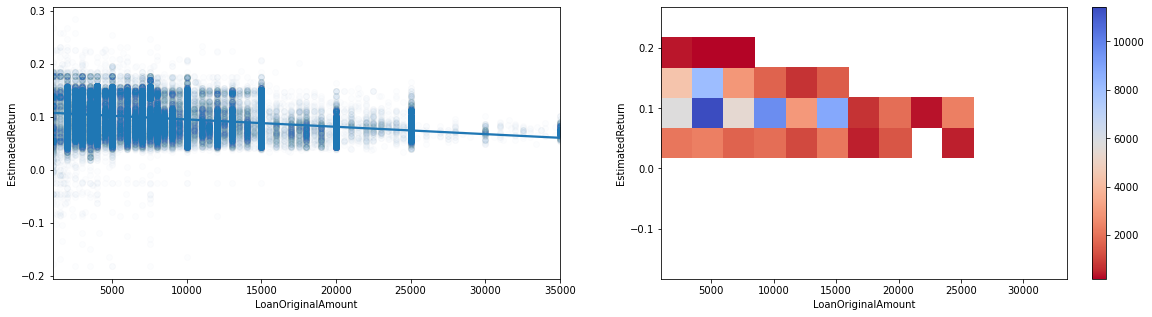

In [76]:
plt.figure(figsize = [20, 5]) 

plt.subplot(1, 2, 1) 
sb.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'EstimatedReturn', scatter_kws={'alpha':0.01});

plt.subplot(1, 2, 2) 
bins_x = np.arange(loan_df['LoanOriginalAmount'].min(), loan_df['LoanOriginalAmount'].max(), 2500)
bins_y = np.arange(loan_df['EstimatedReturn'].min(), loan_df['EstimatedReturn'].max(), 0.05)
plt.hist2d(data=loan_df, x='LoanOriginalAmount', y='EstimatedReturn', cmin=100, cmap='coolwarm_r', bins=[bins_x, bins_y])
plt.ylabel("EstimatedReturn")
plt.xlabel("LoanOriginalAmount")
plt.colorbar();

The left chart shows slight negative correlation , as the Loan Original amount increase, the estimated return is decrease. The second plot shows that most density (dark blue areas) is for Loan Amount (5k) with estimated return 10%, also there is less density for loan Amount 15K and 10% with same estimated return 5%.

Now lets take look if the employement status and what relation of Loan Amount.

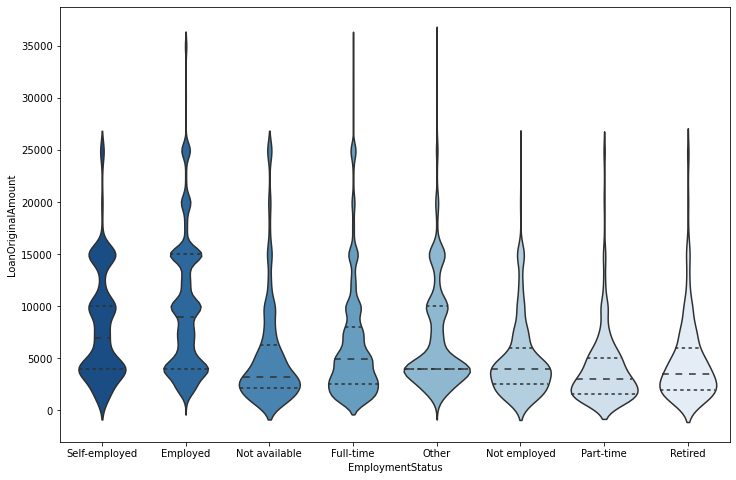

In [19]:
plt.figure(figsize = [12, 8])
base_color=sb.color_palette()[0]
sb.violinplot( data=loan_df, x='EmploymentStatus', y = 'LoanOriginalAmount', color=base_color,
              inner='quartile', palette = 'Blues_r');

This chart shows the relation between employement status and Loan Amount, the chart shows the mean for loans are 5K, there is more verities in values for (self-employed and Employeed) borrowers as thhere is density of value in 10k and 15k. Also for employed borrower, the mean is differ than other borrowers and it's 10K.

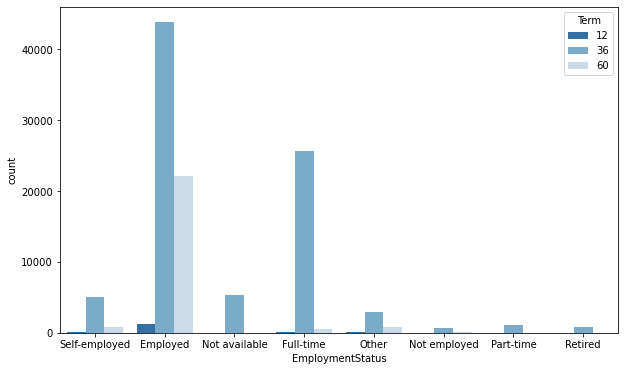

In [20]:
plt.figure(figsize = [10, 6])
#loan_df['LoanOriginationYear'] = loan_df['LoanOriginationDate'].str[0:4] 
sb.countplot(data = loan_df, x='EmploymentStatus', hue='Term', palette = 'Blues_r');

we can see that most frequent loan term for employed and full-time borrower is 3 years, also for employed borrower, the next frequent Loan Amount is 5 years.

Now let's see the relation between employment status and the loan status.

<AxesSubplot:xlabel='EmploymentStatus', ylabel='LoanStatus'>

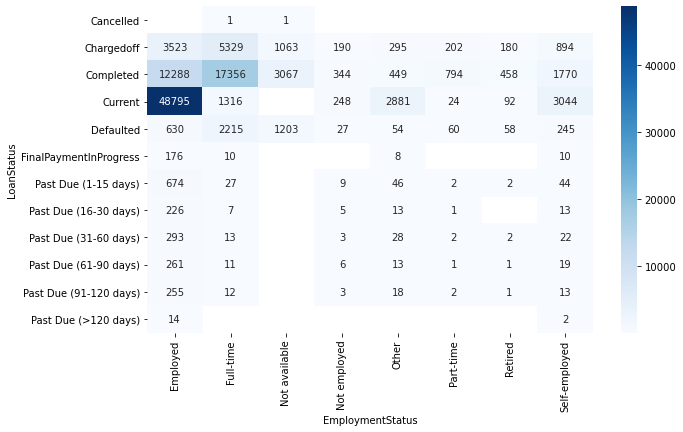

In [21]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
plt.figure(figsize = [10, 6])
ct_counts = loan_df.groupby(['LoanStatus', 'EmploymentStatus']).size()
ct_counts = ct_counts.reset_index(name='count')
pvt_counts = ct_counts.pivot(index = 'LoanStatus', columns = 'EmploymentStatus', values = 'count')
#pvt_counts = pvt_counts.reindex(['AA','A', 'B','C','D', 'E','HR'], axis=1)
sb.heatmap(pvt_counts, annot = True, fmt = '.0f', cmap = 'Blues')

if we focus on completed status, in this heat map we can see most frequent completed Loan is for Employed Borrowers, and Full-time.

Now lets have look at the Estimated Return performance over years.

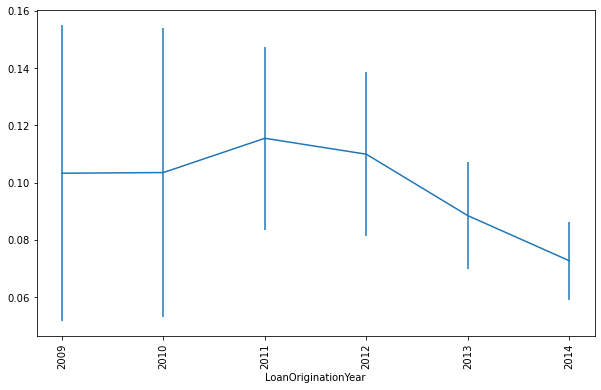

In [22]:
#loan_df.LoanOriginationYear = pd.to_datetime(loan_df['LoanOriginationDate']).dt.year.astype(str) 

plt.figure(figsize = [10, 6])
LoanOriginationYears = loan_df.groupby('LoanOriginationYear').sum()['LoanOriginalAmount'].reset_index()['LoanOriginationYear']
comb_mean = loan_df.groupby('LoanOriginationYear').mean()['EstimatedReturn']
comb_std = loan_df.groupby('LoanOriginationYear').std()['EstimatedReturn']

# Plot the summarized data
plt.errorbar(x=LoanOriginationYears, y=comb_mean, yerr=comb_std)
plt.xlabel('LoanOriginationYear');
plt.xticks(rotation=90);


even though the Loan Amount has decreased from 2011 to 2014 , the standard deviation for the return has decreased also, which reflect more safe Loan investment.

Last and not least, lets have a look at the relation between Prosper Rating and the Estimated Income.

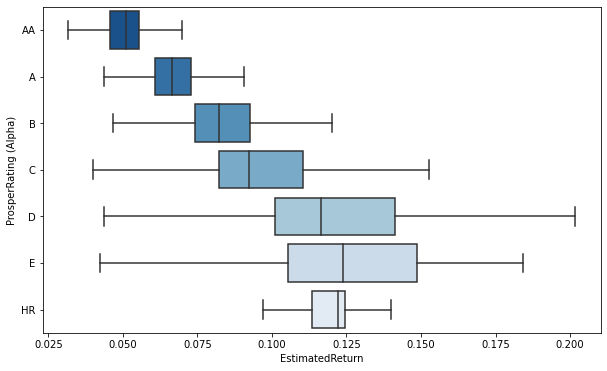

In [23]:
plt.figure(figsize = [10, 6])

sb.boxplot(data = loan_df, y = 'ProsperRating (Alpha)', x = 'EstimatedReturn', palette = "Blues_r", showfliers = False,
          order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']);

This chart suggests that investing in borrowers with proser Class D and E will produce the highest returns. but this need more exploration as it might combined with higher risk.



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> in this analysis we have learned that intrest rate or ( APR ) is decreased as the Loan original Amount increased.
Also we learnd that Employeed Borrower averaget loan is 10K with verities in Laon Amount (5k to 15K) ,
for other employement the density fall in 5K.
we can see that most frequent loan term for employed and full-time borrower is 3 years, also for employed borrower, the next frequent Loan Amount is 5 years.
Also we have seen that most frequent completed Loan is for Employed Borrowers, and Full-time. And finally we have seen that prosper class (D and E) will produce a higher return.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> by consider the Origination year, we can see that eventhough the LoanAmount has decreased from 2011 to 2014 , the standard deviation for the return has decreased also, which reflect more safe Loan invistment

## Multivariate Exploration

> Now let go deeper to find relation between Loan Amount and Original APR and affect of Monthly Loan Payment on it.

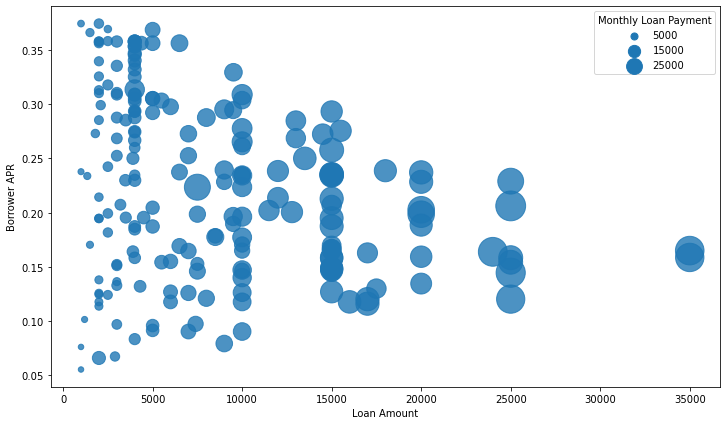

In [24]:
plt.figure(figsize = [12, 7])
np.random.seed(2021)
sample = np.random.choice(loan_df.shape[0],200, replace=False)
loan_df_subset = loan_df.iloc[sample]
sb.regplot(data=loan_df_subset, x='LoanOriginalAmount', y='BorrowerAPR', fit_reg=False, x_jitter=0.04,
          scatter_kws = {'s' : loan_df_subset['MonthlyLoanPayment']})
plt.xlabel("Loan Amount")
plt.ylabel("Borrower APR")


sizes = [50, 150, 250]
labels = [5000,15000,25000]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s, color = base_color))
plt.legend(legend_obj, labels, title="Monthly Loan Payment")

We can see how monthly payment is derived from Loan Amount and Interest rate, a larger payment are linked to larger loan amount and lower interest rate.

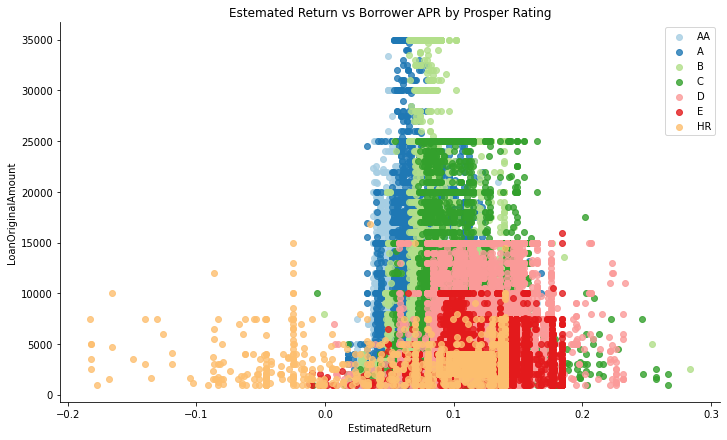

In [64]:
g = sb.FacetGrid(data = loan_df, hue = 'ProsperRating (Alpha)', hue_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR'] , 
                 height = 6, aspect = 1.7, palette="Paired")
g.map(sb.regplot,"EstimatedReturn", "LoanOriginalAmount", fit_reg = False);
plt.legend()
plt.title("Estemated Return vs Borrower APR by Prosper Rating");

Finally, from this chart, we can clearly see that each Prosper rating is group with specific return, there is lot of vaiabilities for High risk borrower and there is chance for mony loss. Also this chart suggest a safe range borrower classes which are (AA, A and B), the classes (C and D) are linked to higher return but also linked to small chance of mony losss. In addition this chart suggest borrwing limit for each classes, which to invist more in safe classes, but less in risky classes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> the first analysis suggest that a larger payment are linked to larger loan amount and lower interest rate.
the second analysis suggest the investment should be specifid by prosper rating, for Class (AA, A and B) we can invist with more than 10k to get more return as the Borrower APR is less than 15%, for other classes (E and HR), it's better to invest less than 10K as it's linked to higher risk but more Borrower APR.

### Were there any interesting or surprising interactions between features?

> the correlation between features (Loan Original Amout, Borrower APR and Prosper Score), the bivariate correltion between ((Loan Original Amout, Borrower APR) suggest lower APR for Lower Loan Amout, but when we consider Proper Rating, we get a different pricture.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!